In [216]:
#Python 3.11.2
#Import packages
import scipy.integrate as scipy
import scipy.optimize as optimize
import scipy.stats as stats
import pandas as pd
import numpy as np
import pylab as pl
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import json # for pretty printing
import geopandas as gpd

import shutil
import sys
import os.path


In [16]:
# import logging

# console_handler = logging.StreamHandler()
# formatter = logging.Formatter("%(levelname)s:%(message)s")
# console_handler.setFormatter(formatter)
# logger = logging.getLogger("pyproj")
# logger.addHandler(console_handler)
# logger.setLevel(logging.DEBUG)

# logging.basicConfig(filename ='example.log', format="%(levelname)s:%(message)s", level=logging.DEBUG)

In [ ]:
# logging.info("Start of the program")
# logging.debug("Start of the program")

Reading the shapefile

In [284]:
parishScania_path = '/Users/polislizarralde/PythonPlayground/docs/PlagueProject/MapScaniaSweden/ParishesScania.shp'
parishScaniaMap = gpd.read_file(parishScania_path)
parishScaniaMap.head()

,G_NAME,GET_END_YE,GET_START_,G_UNIT_TYP,G_UNIT,G_SEQ,geometry
0,HOVS FÖRSAMLING L LÄN,9999,NaN,SWE_KYRK,10744015.0,51568.0,"POLYGON ((4159374.27967 3280178.36063, 4158183..."
1,TOREKOVS FÖRSAMLING,9999,NaN,SWE_KYRK,10744027.0,94148.0,"POLYGON ((4158250.03557 3280475.52635, 4158374..."
2,ÖSTRA KARUPS FÖRSAMLING,9999,NaN,SWE_KYRK,10744039.0,96471.0,"POLYGON ((4175084.90371 3273619.02854, 4174985..."
3,KRISTIANSTADS HELIGA TREFALDIGHETS FÖRSAMLING,9999,NaN,SWE_KYRK,10744052.0,98647.0,"POLYGON ((4249757.03368 3241445.33808, 4249645..."
4,NORRA ÅSUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10744064.0,96757.0,"POLYGON ((4249757.03368 3241445.33808, 4249865..."


In [285]:
len(parishScaniaMap)

438

In [286]:
parishScaniaMap.info(memory_usage='deep')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   G_NAME      438 non-null    object  
 1   GET_END_YE  438 non-null    int64   
 2   GET_START_  44 non-null     float64 
 3   G_UNIT_TYP  438 non-null    object  
 4   G_UNIT      438 non-null    float64 
 5   G_SEQ       438 non-null    float64 
 6   geometry    438 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(2)
memory usage: 88.5 KB


In [288]:
type(parishScaniaMap)

geopandas.geodataframe.GeoDataFrame

Compute the centroids

In [292]:
centroidParishScania = parishScaniaMap.geometry.centroid
type(centroidParishScania)


/var/folders/d7/7wsj4qr14nz8ps73mjd1y9hm0000gp/T/ipykernel_81047/41916796.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroidParishScania = parishScaniaMap.geometry.centroid


geopandas.geoseries.GeoSeries

Add the centroids as a new column to the original GeoDataFrame

In [296]:
for i in range(len(parishScaniaMap)):
    parishScaniaMap.loc[i,'CentroidByPolygon'] = centroidParishScania[i]

parishScaniaMap.head()

,G_NAME,GET_END_YE,GET_START_,G_UNIT_TYP,G_UNIT,G_SEQ,geometry,CentroidByPolygon
0,HOVS FÖRSAMLING L LÄN,9999,NaN,SWE_KYRK,10744015.0,51568.0,"POLYGON ((4159374.27967 3280178.36063, 4158183...",POINT (4162353.095562172 3282055.860910411)
1,TOREKOVS FÖRSAMLING,9999,NaN,SWE_KYRK,10744027.0,94148.0,"POLYGON ((4158250.03557 3280475.52635, 4158374...",POINT (4157750.0618345523 3279338.7830117564)
2,ÖSTRA KARUPS FÖRSAMLING,9999,NaN,SWE_KYRK,10744039.0,96471.0,"POLYGON ((4175084.90371 3273619.02854, 4174985...",POINT (4174979.8829814987 3278160.4581782096)
3,KRISTIANSTADS HELIGA TREFALDIGHETS FÖRSAMLING,9999,NaN,SWE_KYRK,10744052.0,98647.0,"POLYGON ((4249757.03368 3241445.33808, 4249645...",POINT (4251425.760731402 3242373.354322704)
4,NORRA ÅSUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10744064.0,96757.0,"POLYGON ((4249757.03368 3241445.33808, 4249865...",POINT (4252060.3356386265 3236409.6300050574)


Plot the geometry and centroids

/usr/local/lib/python3.11/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


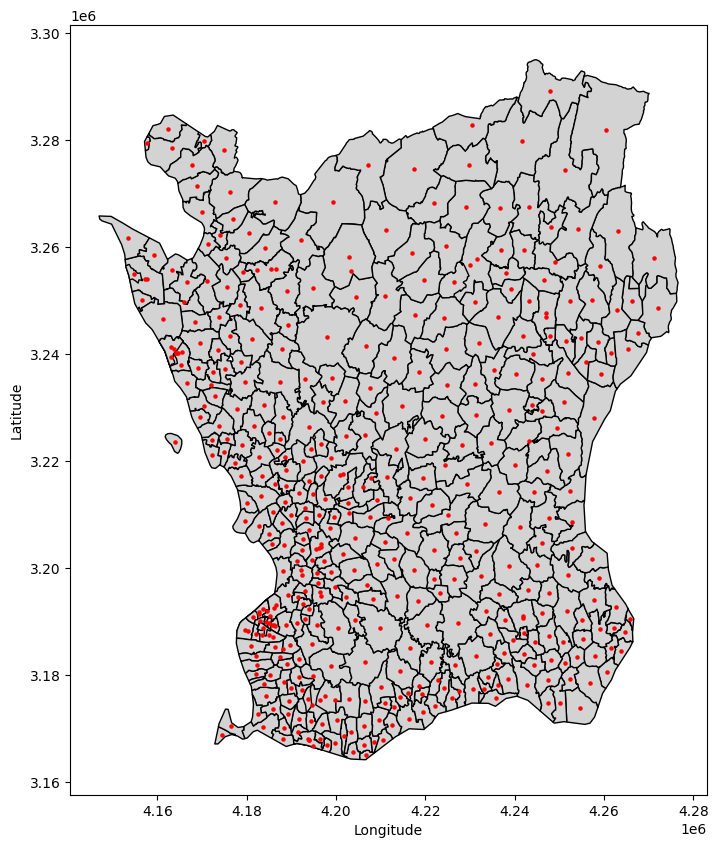

In [297]:
fig, ax = plt.subplots(figsize=(13,10))
parishScaniaMap.plot(ax=ax, column = "G_NAME", edgecolor='black', legend=False, color = 'lightgray')
centroidParishScania.plot(ax=ax, marker = 'o', markersize = 5, label = 'Centroids', color = 'red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.legend()
plt.show()

In [299]:
# import re

# point_str = "POINT(12.345 67.890)"

# # Custom function to extract latitude and longitude from a POINT string
# def get_lat_lon(point_str):
#     match = re.match(r"POINT\(([-+]?[0-9]*\.?[0-9]+) ([-+]?[0-9]*\.?[0-9]+)\)", point_str)
#     latitude, longitude = map(float, match.groups())
#     return latitude, longitude


# # Convert the geometry column to WKT format
# parishScaniaMap['geometry_wkt'] = parishScaniaMap['CentroidByPolygon'].apply(lambda x: x.to_wkt())

# # Apply the custom function to the geometry_wkt column to get the latitude column
# parishScaniaMap[['latitude', 'longitude']] = parishScaniaMap['CentroidByPolygon'].apply(get_lat_lon).apply(pd.Series)

# # Print the GeoDataFrame with the new latitude column
# print(parishScaniaMap.head())


In [ ]:
# logging.info("Start of the program")
# logging.debug("Start of the program")

Compute the distance between centroids of each polygon

In [300]:
nPolygons = len(parishScaniaMap)
distance_matrix = np.zeros((nPolygons,nPolygons))

for i in range(nPolygons):
    centroid_i = parishScaniaMap.loc[i,'CentroidByPolygon']
    for j in range(i+1, nPolygons):
        centroid_j = parishScaniaMap.loc[j,'CentroidByPolygon']
        distance = centroid_i.distance(centroid_j)
        distance_matrix[i,j] = distance
        distance_matrix[j,i] = distance    

print(distance_matrix)   

[[     0.           5345.13159847  13214.00480471 ...  36606.52114251
    8591.24521158 100543.03720335]
 [  5345.13159847      0.          17270.0661889  ...  36576.72316779
   10776.87261824  98908.78134708]
 [ 13214.00480471  17270.0661889       0.         ...  29197.69743522
    7713.09889745  94963.88803833]
 ...
 [ 36606.52114251  36576.72316779  29197.69743522 ...      0.
   28306.97596669  65806.75841437]
 [  8591.24521158  10776.87261824   7713.09889745 ...  28306.97596669
       0.          93035.50240647]
 [100543.03720335  98908.78134708  94963.88803833 ...  65806.75841437
   93035.50240647      0.        ]]


To have access to a submatrix. First, we define the row and column ranges for the submatrix

In [95]:
row_start, row_end = 10, 20
col_start, col_end = 10, 20

Access the submatrix using slicing

In [97]:
submatrix = [row[col_start:col_end] for row in distance_matrix[row_start:row_end]]
print(submatrix)

[array([    0.        , 12646.90007059, 19011.26790942, 20167.17399258,
       20495.25880365, 15527.517871  , 17255.88096447, 16518.14949376,
       12817.12835956,  7166.88844781]), array([12646.90007059,     0.        ,  7285.44873147,  7526.61139138,
       13461.0505274 , 12971.60750314,  9138.4679722 ,  8657.1892664 ,
        6958.4283797 , 15277.37001501]), array([19011.26790942,  7285.44873147,     0.        ,  4989.24086645,
        9195.72128154, 12398.61820005,  5887.92671853,  6063.70026499,
        7985.05367093, 22507.21011318]), array([20167.17399258,  7526.61139138,  4989.24086645,     0.        ,
       14183.15027481, 16924.36058033, 10714.96836741, 10755.74815649,
       11684.37341872, 22085.06181573]), array([20495.25880365, 13461.0505274 ,  9195.72128154, 14183.15027481,
           0.        ,  6589.76743293,  4322.735964  ,  4846.83575519,
        8004.3211845 , 26177.359094  ]), array([15527.517871  , 12971.60750314, 12398.61820005, 16924.36058033,
        6589.

In [93]:
print(distance_matrix)

[[     0.           5345.13159847  13214.00480471 ...  36606.52114251
    8591.24521158 100543.03720335]
 [  5345.13159847      0.          17270.0661889  ...  36576.72316779
   10776.87261824  98908.78134708]
 [ 13214.00480471  17270.0661889       0.         ...  29197.69743522
    7713.09889745  94963.88803833]
 ...
 [ 36606.52114251  36576.72316779  29197.69743522 ...      0.
   28306.97596669  65806.75841437]
 [  8591.24521158  10776.87261824   7713.09889745 ...  28306.97596669
       0.          93035.50240647]
 [100543.03720335  98908.78134708  94963.88803833 ...  65806.75841437
   93035.50240647      0.        ]]


Print distances

In [92]:
print(distance_matrix[10][10])

0.0


To calculate the distance between two points given their latitude and longitude, you can use the Haversine formula. The Haversine formula (see https://en.wikipedia.org/wiki/Haversine_formula) calculates the great-circle distance between two points on a sphere, which is a good approximation for the Earth's surface.

In [301]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Earth radius in kilometers (mean radius)
    R = 6371.01

    # Calculate the distance
    distance = R * c

    return distance

# Example usage
distance = haversine_distance(40.7128, -74.0060, 34.0522, -118.2437)
print(distance, "kilometers")


3935.7524322054765 kilometers


Using Haversine formula to compute the distance between the polygons' centroids:

In [303]:
# from geopy.distance import great_circle



# for i in range(len(centroidParishScania)):
#     for j in range(i + 1, len(centroidParishScania)):
#         distance = great_circle(centroidParishScania[i], centroidParishScania[j]).meters
#         print(f"The Haversine distance between centroid {i+1} and centroid {j+1} is {distance} meters")


In [304]:
# Access the first column
first_column = parishScania.iloc[:, 0]

# Access the last column
last_column = parishScania.iloc[1, -1]
print(last_column)

POLYGON ((4158250.0355738313 3280475.526350782, 4158374.466639277 3280145.0586106633, 4158452.9321924117 3279781.623501739, 4158313.456007825 3279702.054255758, 4158115.0223563765 3279510.5842455197, 4158231.5235192245 3279276.8045503264, 4158036.7586839325 3278209.653374821, 4157348.432187156 3277939.086489549, 4157146.124022989 3279693.930144167, 4157749.9631899674 3280638.922682606, 4157852.1978058186 3280579.172094201, 4158250.0355738313 3280475.526350782))


Plotting

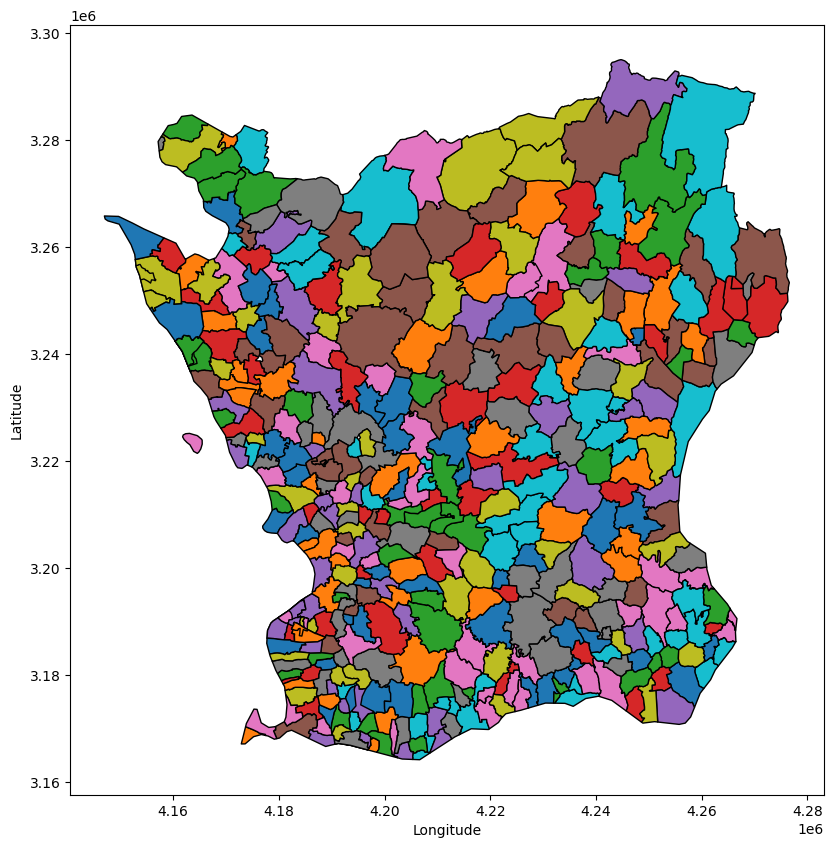

In [305]:
fig,ax = plt.subplots(figsize=(13,10))
parishScania.plot(ax=ax, column = "G_NAME", edgecolor='black', legend=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 0.2))
plt.show()

Before computing the area for each polygon we have to change the projection.

In [306]:
parishScaniaMap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [307]:
parishScania = parishScaniaMap.to_crs({'init': 'epsg:3035'})

#ETRS89-extended / LAEA Europe EPSG:3035 

/usr/local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [308]:
parishScania.crs

<Projected CRS: +init=epsg:3035 +type=crs>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal

Calculate the area

In [309]:
parishScania.sort_values(by='G_NAME', inplace=True)
parishScania.head()

,G_NAME,GET_END_YE,GET_START_,G_UNIT_TYP,G_UNIT,G_SEQ,geometry,CentroidByPolygon
417,ALLERUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10783823.0,96945.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",POINT (4161374.6335366815 3246504.540766848)
370,ALSTADS FÖRSAMLING,9999,1980.0,SWE_KYRK,10783185.0,93165.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",POINT (4196444.972107183 3175286.9635582445)
378,ANDERSLÖVS FÖRSAMLING,9999,NaN,SWE_KYRK,10783264.0,97248.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",POINT (4203002.4440478 3175512.465662167)
305,ANDRARUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10748355.0,51312.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",POINT (4241236.108975449 3207724.2578266934)
272,ANNELÖVS FÖRSAMLING,9999,NaN,SWE_KYRK,10747247.0,93633.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",POINT (4183373.2260855176 3217240.5617163605)
